In [1]:
import sys
sys.path.append('..')

from data_parsers import databento_file_parser
from executor import SimpleExecutor1

import pandas as pd
import math
import numpy as np

from tqdm import tqdm
import math
import numpy
import matplotlib.pyplot as plt
import random
import numpy as np

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 80)

In [53]:
data1 = pd.read_csv('outputs2/backtest_output_avellaneda.csv')
data1['strategy'] = 'Avellaneda'

data2 = pd.read_csv('outputs2/backtest_output_ho_and_stoll.csv')
data2['strategy'] = 'Ho_Stoll'

data_df = pd.concat([data1, data2])
# data_df = pd.concat([data1])
data_df

,Unnamed: 0,ticker,latency,start_ts,eod_position,eod_cash,net_pnl,trading_pnl,avg_size,avg_size_square,trading_volume,volatility,net_return,utility,strategy
0,0,MSFT,0,2023-05-15 14:00:00,5,-1539.56,12.56,29.890,5.127852,64.798428,1377,0.064561,1.155,5.206392,Avellaneda
1,1,MSFT,0,2023-05-15 14:30:00,36,-11104.82,36.18,28.140,5.439905,55.983252,1052,0.065185,-1.565,8.735757,Avellaneda
2,2,MSFT,0,2023-05-15 15:00:00,13,-3979.60,55.71,18.050,7.439834,171.234186,921,0.050350,-0.445,9.782590,Avellaneda
3,3,MSFT,0,2023-05-15 15:30:00,10,-3077.32,26.92,20.855,3.763582,30.653627,674,0.045363,-0.190,10.137012,Avellaneda
4,4,MSFT,0,2023-05-15 16:00:00,2,-544.39,81.35,29.110,10.854523,188.129877,750,0.034280,0.705,18.358493,Avellaneda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,175,MSFT,50,2023-05-19 17:30:00,51,-16201.91,10.42,28.050,8.944957,147.892044,1677,0.031336,0.590,3.878419,Ho_Stoll
176,176,MSFT,50,2023-05-19 18:00:00,8,-2548.05,18.29,37.640,6.948607,134.490745,2250,0.040733,-0.520,4.098893,Ho_Stoll
177,177,MSFT,50,2023-05-19 18:30:00,2,-621.41,39.69,42.995,6.109599,90.243795,2508,0.034842,-0.015,4.975182,Ho_Stoll
178,178,MSFT,50,2023-05-19 19:00:00,-6,1903.62,16.66,34.795,5.847446,76.342021,2146,0.032988,-0.075,3.983531,Ho_Stoll


In [54]:
## Summary Performance
columns = ['net_pnl', 'trading_pnl', 'avg_size', 'trading_volume', 'utility']
data_df.groupby(['strategy', 'ticker', 'latency'])[columns].mean().reset_index()

,strategy,ticker,latency,net_pnl,trading_pnl,avg_size,trading_volume,utility
0,Avellaneda,MSFT,0,14.212333,34.423333,6.909811,1202.100000,6.594413
1,Avellaneda,MSFT,10,11.009000,37.589250,5.808077,2063.116667,4.061733
2,Avellaneda,MSFT,50,9.984167,39.671333,5.906465,2266.900000,4.090885
3,Ho_Stoll,MSFT,0,18.957500,53.414917,7.020246,2187.500000,5.493972
4,Ho_Stoll,MSFT,10,21.560667,50.492750,5.951549,2831.216667,4.289145
5,Ho_Stoll,MSFT,50,18.222167,50.124667,6.051120,2931.283333,3.997949


In [106]:
6.909811 / 1202.100000

0.005748116629232178

In [55]:
data_df.groupby(['strategy', 'ticker', 'latency'])[columns].std().reset_index()

,strategy,ticker,latency,net_pnl,trading_pnl,avg_size,trading_volume,utility
0,Avellaneda,MSFT,0,30.956288,29.990931,2.798303,910.412361,3.661692
1,Avellaneda,MSFT,10,33.828924,27.328715,1.056024,1394.395016,1.782042
2,Avellaneda,MSFT,50,33.255784,26.713841,1.102590,1417.211869,1.739655
3,Ho_Stoll,MSFT,0,27.209611,38.086035,1.480083,1257.709668,1.698829
4,Ho_Stoll,MSFT,10,36.794668,30.251085,1.168555,1555.272106,1.235223
5,Ho_Stoll,MSFT,50,37.752247,28.686662,1.212926,1546.256563,1.165722


In [57]:
## Summary Opening Hours
data_df['opening_hours'] = pd.to_datetime(data_df['start_ts']).dt.hour <= 14
data_df.groupby(['strategy',  'ticker', 'latency', 'opening_hours'])[columns].mean().reset_index()

,strategy,ticker,latency,opening_hours,net_pnl,trading_pnl,avg_size,trading_volume,utility
0,Avellaneda,MSFT,0,False,14.4522,34.5533,7.080038,1164.20,6.763547
1,Avellaneda,MSFT,0,True,13.0130,33.7735,6.058672,1391.60,5.748745
2,Avellaneda,MSFT,10,False,15.9346,34.5595,5.918902,1897.06,4.261328
3,Avellaneda,MSFT,10,True,-13.6190,52.7380,5.253949,2893.40,3.063760
4,Avellaneda,MSFT,50,False,15.3920,37.1384,6.051299,2125.44,4.301779
5,Avellaneda,MSFT,50,True,-17.0550,52.3360,5.182297,2974.20,3.036412
6,Ho_Stoll,MSFT,0,False,19.8856,52.9426,7.158656,2119.98,5.616882
7,Ho_Stoll,MSFT,0,True,14.3170,55.7765,6.328196,2525.10,4.879426
8,Ho_Stoll,MSFT,10,False,25.6434,47.3351,6.134932,2662.60,4.452214
9,Ho_Stoll,MSFT,10,True,1.1470,66.2810,5.034633,3674.30,3.473800


In [58]:
data_df.groupby(['strategy',  'ticker', 'latency', 'opening_hours'])[columns].std().reset_index()

,strategy,ticker,latency,opening_hours,net_pnl,trading_pnl,avg_size,trading_volume,utility
0,Avellaneda,MSFT,0,False,31.854220,32.263996,2.999175,962.537378,3.851373
1,Avellaneda,MSFT,0,True,27.491572,15.112638,1.180814,584.411803,2.487054
2,Avellaneda,MSFT,10,False,30.395199,27.438886,1.066109,1392.410396,1.684539
3,Avellaneda,MSFT,10,True,40.785856,22.158813,0.844487,1127.531049,2.010177
4,Avellaneda,MSFT,50,False,30.912863,26.997060,1.030212,1439.150928,1.756216
5,Avellaneda,MSFT,50,True,32.749614,22.276499,1.221477,1106.093506,1.250959
6,Ho_Stoll,MSFT,0,False,27.150359,40.630934,1.517334,1313.314835,1.760747
7,Ho_Stoll,MSFT,0,True,28.485948,22.663050,1.089758,909.548172,1.239705
8,Ho_Stoll,MSFT,10,False,30.311386,29.852572,1.136525,1534.889865,1.067645
9,Ho_Stoll,MSFT,10,True,57.596456,28.545692,0.893442,1443.201537,1.705869


In [60]:
## Summary Volatility
data_df['Volatility'] = np.where(data_df['volatility'] <= data_df['volatility'].median(), 'Low', 'High')
data_df.groupby(['strategy', 'ticker', 'latency', 'Volatility'])[columns].mean().reset_index()

,strategy,ticker,latency,Volatility,net_pnl,trading_pnl,avg_size,trading_volume,utility
0,Avellaneda,MSFT,0,High,14.134333,50.068167,5.948626,1729.733333,6.414311
1,Avellaneda,MSFT,0,Low,14.290333,18.778500,7.870995,674.466667,6.774514
2,Avellaneda,MSFT,10,High,11.308333,53.193167,5.759215,2861.233333,3.791341
3,Avellaneda,MSFT,10,Low,10.709667,21.985333,5.856938,1265.000000,4.332125
4,Avellaneda,MSFT,50,High,5.962333,54.578500,5.734442,3054.500000,3.682353
5,Avellaneda,MSFT,50,Low,14.006000,24.764167,6.078488,1479.300000,4.499416
6,Ho_Stoll,MSFT,0,High,22.152667,75.620833,6.565517,2945.766667,5.719186
7,Ho_Stoll,MSFT,0,Low,15.762333,31.209000,7.474975,1429.233333,5.268759
8,Ho_Stoll,MSFT,10,High,23.112667,67.938500,5.691098,3727.833333,4.169649
9,Ho_Stoll,MSFT,10,Low,20.008667,33.047000,6.211999,1934.600000,4.408642


In [61]:
data_df.groupby(['strategy', 'ticker', 'latency', 'Volatility'])[columns].std().reset_index()

,strategy,ticker,latency,Volatility,net_pnl,trading_pnl,avg_size,trading_volume,utility
0,Avellaneda,MSFT,0,High,35.580239,33.868944,1.183598,973.832420,3.038451
1,Avellaneda,MSFT,0,Low,26.146934,13.282340,3.552274,402.416642,4.240169
2,Avellaneda,MSFT,10,High,42.710603,30.142695,1.059436,1521.091275,1.605064
3,Avellaneda,MSFT,10,Low,22.447120,10.350496,1.068401,569.290423,1.932189
4,Avellaneda,MSFT,50,High,39.457585,29.893144,1.175144,1574.830078,1.370960
5,Avellaneda,MSFT,50,Low,25.683917,9.924386,1.015453,568.101809,1.983007
6,Ho_Stoll,MSFT,0,High,34.712295,41.435469,1.027636,1311.012367,1.772741
7,Ho_Stoll,MSFT,0,Low,16.738875,14.628748,1.724233,556.659785,1.619879
8,Ho_Stoll,MSFT,10,High,49.674507,33.029503,0.922556,1679.490093,1.516396
9,Ho_Stoll,MSFT,10,Low,16.788072,11.881333,1.336665,661.195344,0.880434


# Return Markouts

In [71]:
tick_data_df[tick_data_df['action'] == 'T']

,ts_event,action,side,depth,price,size,flags,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_px_01,ask_px_01,bid_sz_01,ask_sz_01,bid_px_02,ask_px_02,bid_sz_02,ask_sz_02,bid_px_03,ask_px_03,bid_sz_03,ask_sz_03,bid_px_04,ask_px_04,bid_sz_04,ask_sz_04,bid_px_05,ask_px_05,bid_sz_05,ask_sz_05,bid_px_06,ask_px_06,bid_sz_06,ask_sz_06,bid_px_07,ask_px_07,bid_sz_07,ask_sz_07,bid_px_08,ask_px_08,bid_sz_08,ask_sz_08,bid_px_09,ask_px_09,bid_sz_09,ask_sz_09,symbol
ts_recv,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-05-16 14:00:00.019614285,2023-05-16 14:00:00.019444002,T,B,0,312.17,38,0,312.13,312.17,10,38,312.12,312.18,50,200,312.09,312.19,250,250,312.07,312.20,80,283,312.06,312.22,2,650,312.05,312.23,285,80,312.03,312.24,50,290,312.02,312.26,100,57,312.01,312.28,50,250,312.00,312.29,1945,225,MSFT
2023-05-16 14:00:00.019614285,2023-05-16 14:00:00.019444002,T,N,0,312.17,40,0,312.13,312.18,10,200,312.12,312.19,50,250,312.09,312.20,250,283,312.07,312.22,80,650,312.06,312.23,2,80,312.05,312.24,285,290,312.03,312.26,50,57,312.02,312.28,100,250,312.01,312.29,50,225,312.00,312.30,1945,50,MSFT
2023-05-16 14:00:00.019614285,2023-05-16 14:00:00.019444002,T,B,0,312.18,200,0,312.13,312.18,10,200,312.12,312.19,50,250,312.09,312.20,250,283,312.07,312.22,80,650,312.06,312.23,2,80,312.05,312.24,285,290,312.03,312.26,50,57,312.02,312.28,100,250,312.01,312.29,50,225,312.00,312.30,1945,50,MSFT
2023-05-16 14:00:00.019614285,2023-05-16 14:00:00.019444002,T,B,0,312.19,200,0,312.13,312.19,10,250,312.12,312.20,50,283,312.09,312.22,250,650,312.07,312.23,80,80,312.06,312.24,2,290,312.05,312.26,285,57,312.03,312.28,50,250,312.02,312.29,100,225,312.01,312.30,50,50,312.00,312.31,1945,19,MSFT
2023-05-16 14:00:00.019614285,2023-05-16 14:00:00.019444002,T,B,0,312.19,10,130,312.13,312.19,10,50,312.12,312.20,50,283,312.09,312.22,250,650,312.07,312.23,80,80,312.06,312.24,2,290,312.05,312.26,285,57,312.03,312.28,50,250,312.02,312.29,100,225,312.01,312.30,50,50,312.00,312.31,1945,19,MSFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-16 19:59:59.942624950,2023-05-16 19:59:59.942459959,T,A,0,311.76,100,130,311.76,311.77,4158,100,311.75,311.78,3455,451,311.74,311.79,8763,244,311.73,311.80,3638,345,311.72,311.81,2760,245,311.71,311.82,466,423,311.70,311.83,5491,545,311.69,311.84,8808,445,311.68,311.85,145,545,311.67,311.86,2645,495,MSFT
2023-05-16 19:59:59.942659730,2023-05-16 19:59:59.942495078,T,A,0,311.76,100,130,311.76,311.77,4058,100,311.75,311.78,3455,451,311.74,311.79,8763,244,311.73,311.80,3638,345,311.72,311.81,2760,245,311.71,311.82,466,423,311.70,311.83,5491,545,311.69,311.84,8808,445,311.68,311.85,145,545,311.67,311.86,2645,495,MSFT
2023-05-16 19:59:59.942679192,2023-05-16 19:59:59.942514667,T,A,0,311.76,100,130,311.76,311.77,3958,100,311.75,311.78,3455,451,311.74,311.79,8763,244,311.73,311.80,3638,345,311.72,311.81,2760,245,311.71,311.82,466,423,311.70,311.83,5491,545,311.69,311.84,8808,445,311.68,311.85,145,545,311.67,311.86,2645,495,MSFT


In [67]:
from itertools import product

TICKERS = ['MSFT']
TEST_DATES = ['20230515', '20230516', '20230517', '20230518', '20230519']
TEST_SAMPLE = list(product(TICKERS, TEST_DATES))

mid_price_df = []
for ticker, date in TEST_SAMPLE:
    data_file_path = f'../data/databento/{ticker}/xnas-itch-{date}.mbp-10.dbn.zst'
    tick_data_df = databento_file_parser(data_file_path)
    print(ticker, date)
    midprice = tick_data_df[['bid_px_00', 'ask_px_00']].mean(axis=1)
    mid_price_df.append(midprice)
    # del tick_data_df

msft_mid_price = pd.concat(mid_price_df)
msft_mid_price.name = 'mid_price'
msft_mid_price

MSFT 20230515
MSFT 20230516


KeyboardInterrupt: 

In [62]:
trade_tables = {}

trade_df1 = pd.read_csv('outputs2/backtest_output_avellaneda_trades.csv')
trade_df1['ts'] = pd.to_datetime(trade_df1['ts'])
trade_df1 = trade_df1.set_index('ts')
trade_df1

trade_tables['Avellaneda'] = trade_df1
trade_df2 = pd.read_csv('outputs2/backtest_output_ho_and_stoll_trades.csv')
trade_df2['ts'] = pd.to_datetime(trade_df2['ts'])
trade_df2 = trade_df2.set_index('ts')
trade_df2
trade_tables['Ho_Stoll'] = trade_df2

In [112]:
def create_markouts(trade_df, mid_price_df):

    ts_delta_milli = [0, 1, 2, 3, 4, 5, 10, 20, 50, 100, 200, 500]
    returns = []

    for delta in ts_delta_milli:
        trade_df['ts_lag'] = trade_df.index +  pd.Timedelta(milliseconds=delta)
        lag_price = pd.merge_asof(trade_df, mid_price_df, left_on = 'ts_lag', right_index=True, direction='forward')['mid_price']    
        ret = (lag_price - trade_df['price']) / lag_price * 1e4 * np.sign(trade_df['size'])

        returns.append((delta, ret.mean(), ret.std()))

    return pd.DataFrame(returns, columns=['lag', 'return', 'std'])

In [113]:
# By Latency

tbls = []
for strategy in trade_tables:
    trades = trade_tables[strategy]
    for latency in trades['latency'].unique():
        t_df = trades[trades['latency'] == latency]
        markouts_df1 = create_markouts(t_df.copy(), msft_mid_price)
        markouts_df1['strategy'] = strategy
        markouts_df1['latency'] = latency
        tbls.append(markouts_df1)

markouts_df = pd.concat(tbls)
print(markouts_df)

    lag    return       std    strategy  latency
0     0  0.642358  0.714548  Avellaneda        0
1     1  0.329293  0.740814  Avellaneda        0
2     2  0.286819  0.709502  Avellaneda        0
3     3  0.258658  0.694702  Avellaneda        0
4     4  0.238412  0.701315  Avellaneda        0
5     5  0.214034  0.662143  Avellaneda        0
6    10  0.136231  0.641261  Avellaneda        0
7    20  0.032632  0.732507  Avellaneda        0
8    50 -0.009330  1.062991  Avellaneda        0
9   100  0.015843  1.103996  Avellaneda        0
10  200  0.034600  1.351130  Avellaneda        0
11  500  0.012963  2.073664  Avellaneda        0
0     0  0.299771  0.254091  Avellaneda       10
1     1  0.038444  0.282635  Avellaneda       10
2     2  0.019978  0.323371  Avellaneda       10
3     3  0.010787  0.339112  Avellaneda       10
4     4  0.002283  0.356873  Avellaneda       10
5     5 -0.001102  0.359307  Avellaneda       10
6    10 -0.023509  0.395297  Avellaneda       10
7    20 -0.045108  0

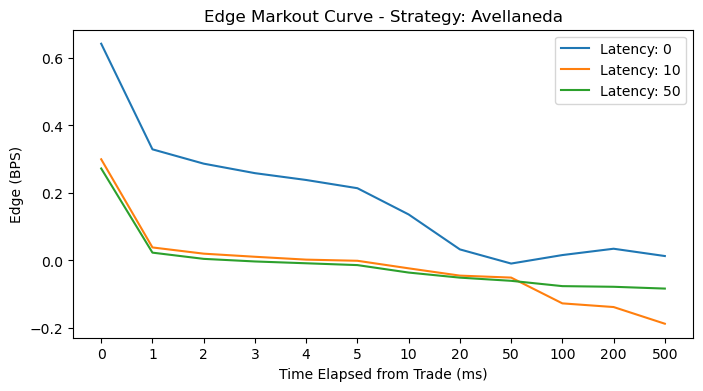

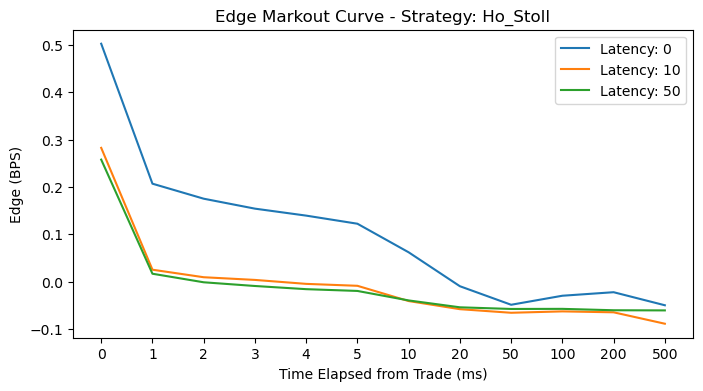

In [119]:
strategies = markouts_df['strategy'].unique()

# Create subplots for each strategy
for strategy in strategies:
    # Filter data for the current strategy
    strategy_data = markouts_df[markouts_df['strategy'] == strategy]

    # Create a new subplot for the current strategy
    plt.figure(figsize=(8, 4))
    plt.title(f"Edge Markout Curve - Strategy: {strategy}")
    plt.xlabel('Time Elapsed from Trade (ms)')
    plt.ylabel('Edge (BPS)')

    # Plot separate lines for each latency
    latencies = strategy_data['latency'].unique()
    for latency in latencies:
        latency_data = strategy_data[strategy_data['latency'] == latency]
        plt.plot(latency_data['lag'].astype(str), latency_data['return'], label=f"Latency: {latency}")

    plt.legend()
    plt.show()
